In [1]:
""" This module quantifies the reduced number and frequency of days below freezing """

' This module quantifies the reduced number and frequency of days below freezing '

In [2]:
from class_ai import Temperature_Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
### Set up my Class
data = pd.read_excel("cleandata.xlsx", sheet_name=None)
tp = Temperature_Data(data)
years = tp.years
years = years[::-1]

In [4]:
ice_growth_days = np.zeros( len(years)  )
months = np.arange(1,13)

for i, year in enumerate(years):
    count = 0
    for month in months:
        temps = tp.collect_month(month,year,"average")
        for temp in temps:
            if temp < 32.0:
                count+=1
    ice_growth_days[i] = count
print("Completed.")

Completed.


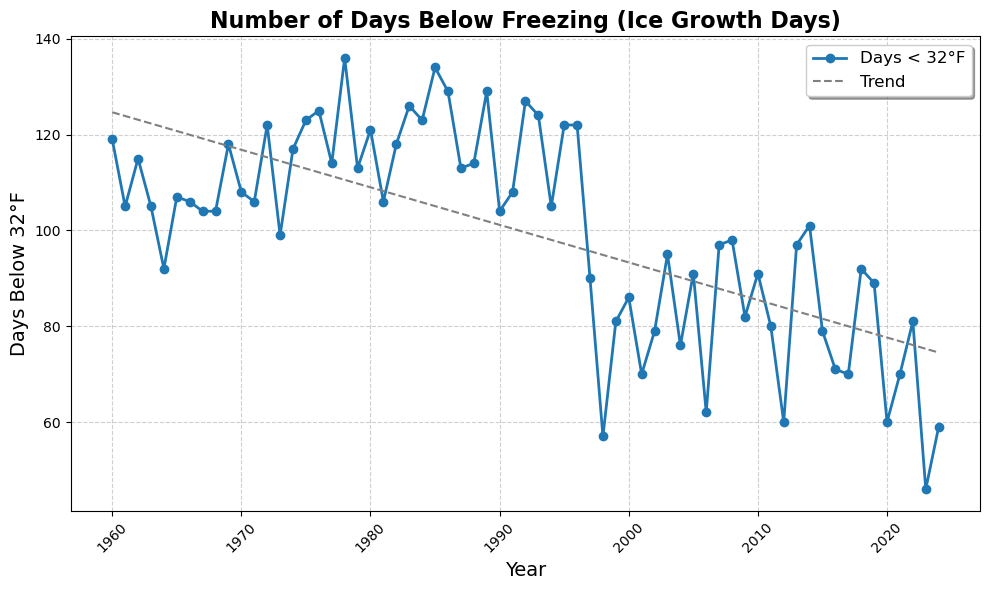

Trend: -7.84 days lost/gained per decade
Total days lost since records: 50.928977272727224


In [5]:
# Convert years to integers
x = np.array(years).astype(int)
y = ice_growth_days

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linewidth=2, label='Days < 32°F')

# Add trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), linestyle='--', color='gray', label='Trend')

# Titles and labels
plt.title("Number of Days Below Freezing (Ice Growth Days)", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Days Below 32°F", fontsize=14)

# Style improvements
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend(frameon=True, shadow=True, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Optional: output trend info
days_per_decade = z[0] * 10
print(f"Trend: {days_per_decade:.2f} days lost/gained per decade")
print("Total days lost since records:",abs(z[0]*len(years)))
